In [ ]:
!python checksum.py X_Test_Data_Input.csv
!python checksum.py Y_Test_Data_Target.csv


SHA256 Checksum: 4def397cabaf0fee6bb34fc47a48d2056a2b33eabb62c32794b6cb96abee8b89
SHA256 Checksum: 9857969bc83f591bba87394fb38aeb1ad966f84d4b44534f5f17acb2a9313793


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load training data
X_train = pd.read_csv('X_Train_Data_Input.csv')
Y_train = pd.read_csv('Y_Train_Data_Target.csv')

# Load test data
X_test = pd.read_csv('X_Test_Data_Input.csv')
Y_test = pd.read_csv('Y_Test_Data_Target.csv')

# Display the first few rows of the datasets
print("X_train head:")
print(X_train.head())
print("\nY_train head:")
print(Y_train.head())


X_train head:
                                 ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column12  Column13  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0         0   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0         0   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1         1   
3       NaN       NaN -0.407939 -0.015607 -0.774979  ...         0         0   
4 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0         0   

   Column14  Column15  Column16  Column17  Colum

In [ ]:
# Select only numeric columns from X_train
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numeric columns with the median of each column
X_train[numeric_columns].fillna(X_train[numeric_columns].median(), inplace=True)

# Verify that missing values have been handled
print("Missing values in X_train after filling:")
print(X_train.isnull().sum())


Missing values in X_train after filling:
ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64


<ipython-input-24-8a2818a4bd53>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_columns].fillna(X_train[numeric_columns].median(), inplace=True)


In [ ]:
# Fill missing values in numeric columns with the median of each column
for column in numeric_columns:
    X_train.loc[X_train[column].isnull(), column] = X_train[column].median()

# Verify that missing values have been handled
print("Missing values in X_train after filling:")
print(X_train.isnull().sum())


Missing values in X_train after filling:
ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64


In [ ]:
# Check for missing values in Y_train
print("Missing values in Y_train:")
print(Y_train.isnull().sum())

# Display the head of Y_train
print("\nY_train head:")
print(Y_train.head())


Missing values in Y_train:
ID        0
target    0
dtype: int64

Y_train head:
                                 ID  target
0  ad1a67e4cbddc767a3456b0d94299b9e       0
1  7246d2f76ac0c217ec25e72ea5f014cb       0
2  22ba388e7dd14c13342c49e75fc29dda       0
3  59f9b981472d97342587fb3e6392aeb1       1
4  f6317cf7ecf126859804eddff279aead       0


In [ ]:
# Drop the ID column from X_train and Y_train
X_train_final = X_train.drop(columns=['ID'])
Y_train_final = Y_train['target']

# Display the shapes of the new feature and target sets
print(f"X_train_final shape: {X_train_final.shape}")
print(f"Y_train_final shape: {Y_train_final.shape}")


X_train_final shape: (785133, 22)
Y_train_final shape: (785133,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the training data into training and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(
    X_train_final, Y_train_final, test_size=0.2, random_state=42
)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train_split, Y_train_split)

# Make predictions on the validation set
Y_val_pred = model.predict(X_val_split)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_val_split, Y_val_pred))
print("\nClassification Report:")
print(classification_report(Y_val_split, Y_val_pred))


Confusion Matrix:
[[139799   2476]
 [  1226  13526]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    142275
           1       0.85      0.92      0.88     14752

    accuracy                           0.98    157027
   macro avg       0.92      0.95      0.93    157027
weighted avg       0.98      0.98      0.98    157027



In [33]:
# Identify numeric columns in X_test_final
numeric_columns_test = X_test_final.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in identified numeric columns with the median
X_test_final[numeric_columns_test] = X_test_final[numeric_columns_test].fillna(X_test_final[numeric_columns_test].median())

# Check again for any remaining NaN values
print("NaN values in X_test_final after filling:")
print(X_test_final.isna().sum())

# Make predictions on the test set if there are no NaNs
if X_test_final.isna().sum().sum() == 0:
    predictions = model.predict(X_test_final)
    print("Predictions on the test set:")
    print(predictions)
else:
    print("There are still NaN values in X_test_final. Please check the data.")


<ipython-input-33-3d83b2f9943f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_final[numeric_columns_test] = X_test_final[numeric_columns_test].fillna(X_test_final[numeric_columns_test].median())


NaN values in X_test_final after filling:
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64
Predictions on the test set:
[0 0 0 ... 0 0 0]


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming Y_test is the true labels for the test set
# Calculate the confusion matrix
cm = confusion_matrix(Y_test['target'], predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate and print the classification report
report = classification_report(Y_test['target'], predictions)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[232801   4233]
 [  1874  22804]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.92      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712



In [35]:
# Check unique values and their types in Y_test
print("Unique values in Y_test:", Y_test['target'].unique())
print("Y_test type:", Y_test['target'].dtype)

# If Y_test contains string values, convert to integers
if Y_test['target'].dtype == 'object':
    Y_test['target'] = Y_test['target'].astype(int)

# Generate and display the confusion matrix
confusion = confusion_matrix(Y_test['target'], predictions)
print("Confusion Matrix:\n", confusion)

# Generate and display the classification report
report = classification_report(Y_test['target'], predictions)
print("Classification Report:\n", report)


Unique values in Y_test: [0 1]
Y_test type: int64
Confusion Matrix:
 [[232801   4233]
 [  1874  22804]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.92      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712



In [55]:
!pip install joblib


In [56]:
from joblib import dump

# Save the model to a file
dump(model, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [60]:
from google.colab import files

uploaded = files.upload()


Saving random_forest_model.joblib to random_forest_model (1).joblib


In [61]:
from joblib import load

model = load('random_forest_model.joblib')


In [62]:

# Load the test features (assuming you have it in a CSV file)
X_test = pd.read_csv('X_Test_Data_Input.csv')



In [63]:
# Check the columns of the training data
print(X_train.columns)


Index(['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21'],
      dtype='object')


In [64]:
# Check the columns of the test data
print(X_test.columns)


Index(['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21'],
      dtype='object')


In [65]:
# Drop the 'ID' column from the test data
X_test = X_test.drop(columns=['ID'])


In [66]:
# Check for NaN values in the test data
nan_count = X_test.isna().sum()
print(nan_count[nan_count > 0])


Column0          2
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column8       1234
Column9     243853
Column14    121679
Column15      5485
dtype: int64


In [67]:
# Fill missing values in numerical columns with the median
X_test.fillna(X_test.median(), inplace=True)


In [68]:
# Make predictions using the loaded model
predictions = model.predict(X_test)

# Display the predictions
predictions


array([0, 0, 0, ..., 0, 0, 0])

In [69]:
# Check the types and values of Y_test and predictions
print("Y_test values and types:")
print(Y_test.value_counts())
print(type(Y_test.iloc[0]))

print("\nPredictions values and types:")
print(np.unique(predictions))
print(type(predictions[0]))


Y_test values and types:
ID                                target
0000117dd352c57530da7e88e8c3a657  1         1
aa6f895cd1106a85ff8b9081855fe5a1  0         1
aa6b04bbc8c3e85721efcf3a4a450b2c  0         1
aa6b5aa3eaa42c2605c09be662df4ea2  0         1
aa6c1b5251434cf00880771a0c5650d6  0         1
                                           ..
54ae7eb2fc458b55f415d3d6245deae6  0         1
54aeff827aace3750a7eff4f7f316f0b  0         1
54af044f1871943d966ed5758753d4d8  0         1
54af1d908c33c8bbe8d91d260bc084dd  0         1
ffff9846ccf06c932832c14e914d8d32  0         1
Name: count, Length: 261712, dtype: int64
<class 'pandas.core.series.Series'>

Predictions values and types:
[0 1]
<class 'numpy.int64'>


In [74]:

# Check the types and values of Y_test and predictions
print("Y_test values and types:")
print(Y_test.value_counts())
print(type(Y_test.iloc[0]))

print("\nPredictions values and types:")
print(np.unique(predictions))
print(type(predictions[0]))



Y_test values and types:
ID                                target
0000117dd352c57530da7e88e8c3a657  1         1
aa6f895cd1106a85ff8b9081855fe5a1  0         1
aa6b04bbc8c3e85721efcf3a4a450b2c  0         1
aa6b5aa3eaa42c2605c09be662df4ea2  0         1
aa6c1b5251434cf00880771a0c5650d6  0         1
                                           ..
54ae7eb2fc458b55f415d3d6245deae6  0         1
54aeff827aace3750a7eff4f7f316f0b  0         1
54af044f1871943d966ed5758753d4d8  0         1
54af1d908c33c8bbe8d91d260bc084dd  0         1
ffff9846ccf06c932832c14e914d8d32  0         1
Name: count, Length: 261712, dtype: int64
<class 'pandas.core.series.Series'>

Predictions values and types:
[0 1]
<class 'numpy.int64'>


In [77]:
# Assuming your target column is named 'target' in Y_test
Y_test_values = Y_test['target'].values

# Now calculate the accuracy and other metrics
accuracy = accuracy_score(Y_test_values, predictions)
precision = precision_score(Y_test_values, predictions)
recall = recall_score(Y_test_values, predictions)
f1 = f1_score(Y_test_values, predictions)

# Display the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9687862994436632
Precision: 0.8050781683113427
Recall: 0.8826890347678094
F1 Score: 0.8420991591765729


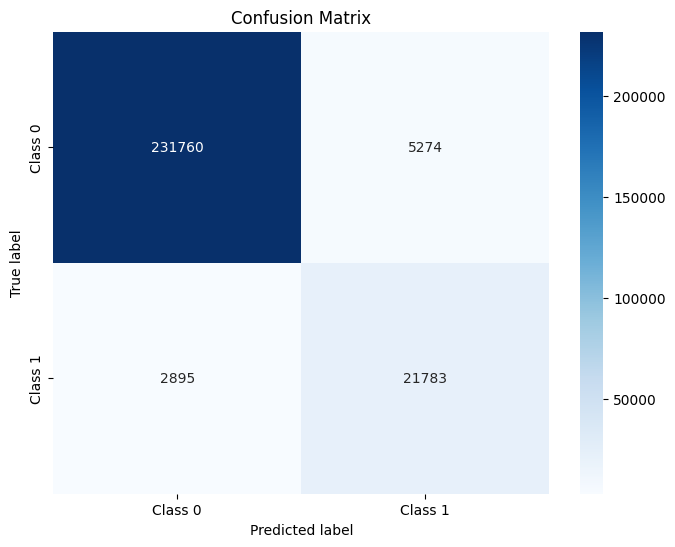

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(Y_test_values, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


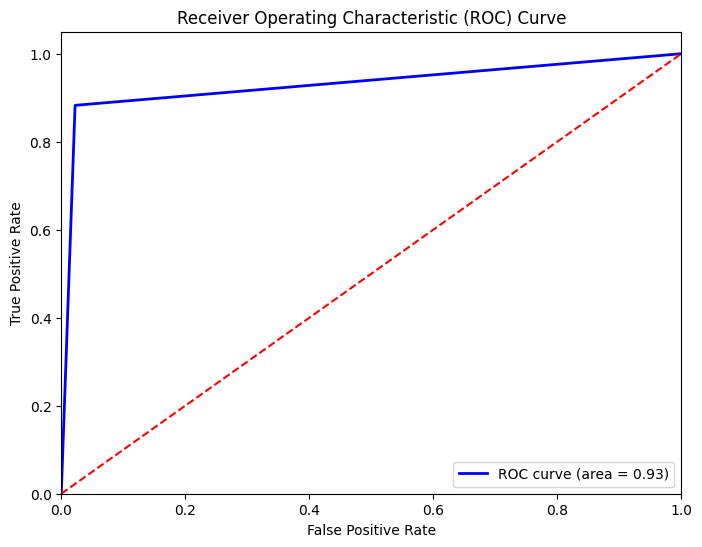

In [84]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test_values, predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


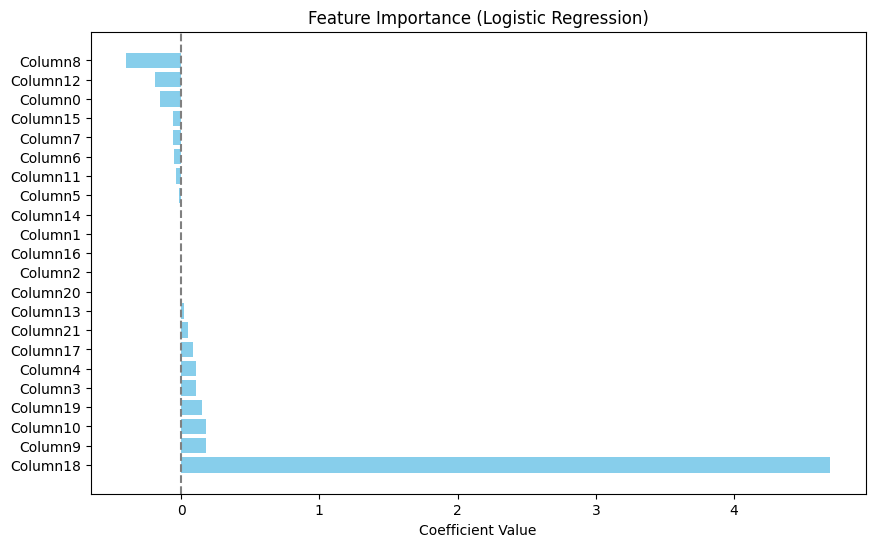

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the logistic regression coefficients
coefficients = model.coef_[0]  # Get the coefficients from the model
feature_names = X_test.columns  # Get feature names

# Create a DataFrame for better handling
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.axvline(0, color='grey', linestyle='--')  # Line at 0 for reference
plt.show()


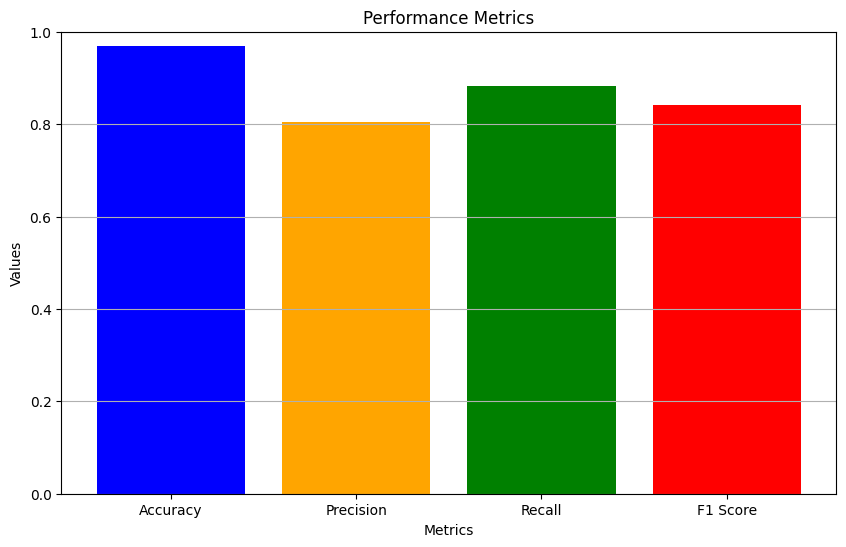

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.9688, 0.8051, 0.8827, 0.8421]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.grid(axis='y')

# Show the plot
plt.show()


In [88]:
import joblib

# Load the saved Random Forest model
random_forest_model = joblib.load('random_forest_model.joblib')


In [91]:
# Check the type and shape of Y_test
print("Type of Y_test:", type(Y_test))
print("Shape of Y_test:", Y_test.shape)

# If Y_test is a DataFrame, we can check the columns
if isinstance(Y_test, pd.DataFrame):
    print("Columns in Y_test:", Y_test.columns)


Type of Y_test: <class 'pandas.core.frame.DataFrame'>
Shape of Y_test: (261712, 2)
Columns in Y_test: Index(['ID', 'target'], dtype='object')


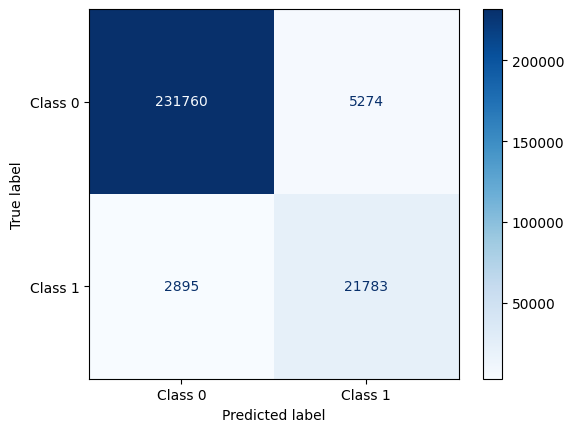

In [92]:
# Extract the target values from Y_test
Y_test_values = Y_test['target'].values

# Now generate the confusion matrix plot
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming 'random_forest_model' is defined and fitted
ConfusionMatrixDisplay.from_estimator(
    random_forest_model,
    X_test,
    Y_test_values,
    display_labels=["Class 0", "Class 1"],
    cmap="Blues",
    normalize=None
)


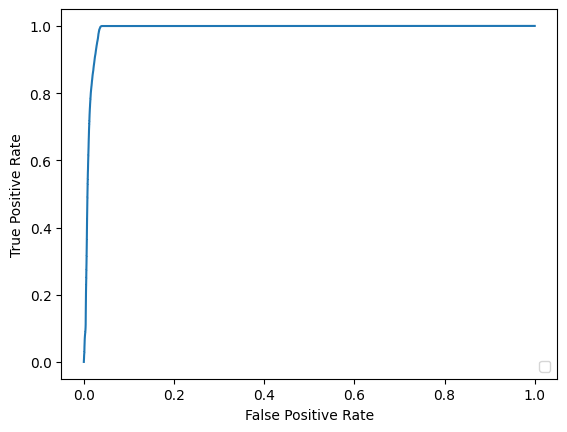

In [93]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Generate the predicted probabilities for X_test
Y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_values, Y_pred_proba)

# Plot the ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


In [94]:
!pip install matplotlib seaborn


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
metrics = {
    'Accuracy': 0.9688,
    'Precision': 0.8051,
    'Recall': 0.8827
}


<ipython-input-97-c382244e36f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


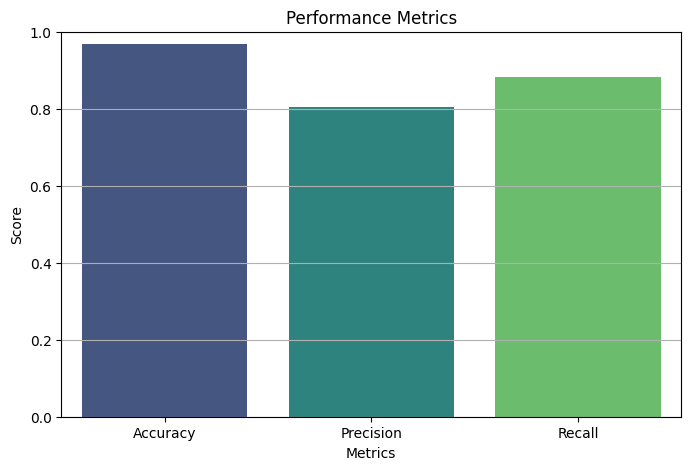

In [97]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Performance Metrics')
plt.ylim(0, 1)  # Set the limit from 0 to 1
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')
plt.show()


In [108]:
# Verify checksums for the test files
!python checksum.py X_Test_Data_Input.csv
!python checksum.py Y_Test_Data_Target.csv

# Verify checksums for the train files
!python checksum.py X_Train_Data_Input.csv
!python checksum.py Y_Train_Data_Target.csv



SHA256 Checksum: 4def397cabaf0fee6bb34fc47a48d2056a2b33eabb62c32794b6cb96abee8b89
SHA256 Checksum: 9857969bc83f591bba87394fb38aeb1ad966f84d4b44534f5f17acb2a9313793
SHA256 Checksum: 5e4871f01f3aa565aaee0fda58868046ff20c3e5d9084c3edc2c1f33ab97497b
SHA256 Checksum: 986eb33c09f9d275b36c1c06fa05de4a06bd9413ab5ed9986fe0f82c66ccf3c8
